## TOC:
* [Setup](#first-bullet)
* [Image Captioning (Conditional and Unconditional)](#second-bullet)
* [Zero-shot Image Classification](#third-bullet)
* [Few-shot and One-shot learning](#forth-bullet)
* [Weakly Labeled and Weakly Supervised Techniques](#fifth-bullet)
* [TLDR](#last-bullet)

## Setup <a class="anchor" id="first-bullet"></a>

## Image Captioning (Conditional and Unconditional) <a class="anchor" id="second-bullet"></a>

## **Introduction**
Image captioning generates descriptive text for images. It bridges computer vision and NLP.

## **Types of Image Captioning**
1. **Unconditional:** Captions depend solely on the image.
2. **Conditional:** Captions depend on both the image and a user-provided query.

## **Mathematical Formulation**
Unconditional Captioning:
$$
P(C|I) = \prod_{t=1}^{T} P(w_t | w_{1:t-1}, I)
$$
Conditional Captioning:
$$
P(C|I, Q) = \prod_{t=1}^{T} P(w_t | w_{1:t-1}, I, Q)
$$

## **Neural Network Architecture**
1. **Encoder-Decoder:**
   - Encoder: Extract features from images using CNNs or Vision Transformers.
   - Decoder: Generate captions using RNNs, GRUs, or Transformers.
2. **Attention Mechanism:** Focuses on image regions relevant to each word.

---

### Conditional

In [7]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load BLIP model and processor
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load image
raw_image = Image.open("..\L1\human_knees.webp").convert('RGB')

# conditional image captioning
text = "the person"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

the person is sitting on the floor


### Unconditional

In [8]:
inputs = processor(raw_image, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a small doll sitting on the floor with a paint swater


# **BLIP (Bootstrapped Language-Image Pretraining)**

## **Overview**
BLIP is a multimodal model designed for tasks like image captioning, visual question answering, and image-text retrieval. It combines visual and textual modalities effectively, leveraging large-scale datasets to learn robust representations.

---

## **Architecture of BLIP**

BLIP uses a **two-stage framework**:
1. **Vision-Language Pretraining (VLP):**
   - Pretrained on large-scale image-text datasets using objectives like image-text matching and caption generation.
2. **Fine-Tuning:**
   - Fine-tuned on specific tasks like image captioning or visual question answering.

### **Core Components**
1. **Visual Encoder:**
   - Uses a Vision Transformer (ViT) to extract image features and encode them into high-dimensional visual embeddings.
2. **Text Encoder:**
   - A transformer-based model (e.g., BERT) to encode text features into a shared embedding space.
3. **Multimodal Encoder:**
   - Combines image and text embeddings using cross-attention mechanisms for reasoning over multimodal data.
4. **Text Decoder:**
   - A transformer-based decoder that generates text (e.g., captions) word-by-word.

---

## **Mathematical Formulation**

### **Pretraining Objectives**

1. **Image-Text Matching (ITM):**
   Predicts whether an image-text pair is aligned:
   $$
   \mathcal{L}_{\text{ITM}} = - \log P(y | I, T)
   $$
   where $ y $ is a binary label indicating alignment, and $ I, T $ are the image and text embeddings.

2. **Image-Text Contrastive Loss (ITC):**
   Aligns image and text embeddings in a shared space using contrastive learning:
   $$
   \mathcal{L}_{\text{ITC}} = - \log \frac{\exp(\text{sim}(f(I), g(T)))}{\sum_j \exp(\text{sim}(f(I), g(T_j)))} - \log \frac{\exp(\text{sim}(f(I), g(T)))}{\sum_k \exp(\text{sim}(f(I_k), g(T)))}
   $$
   where $ f(I) $ and $ g(T) $ are image and text embeddings, and $ \text{sim} $ is cosine similarity.

3. **Image Captioning (Causal Language Modeling):**
   Models the likelihood of a caption $ C = (w_1, w_2, ..., w_T) $ given an image $ I $:
   $$
   P(C | I) = \prod_{t=1}^T P(w_t | w_{1:t-1}, I)
   $$
   Learned using cross-entropy loss.

### **Fine-Tuning**
Specific tasks (e.g., caption generation) use a causal language modeling (CLM) loss:
$$
\mathcal{L}_{\text{CLM}} = - \sum_{t=1}^T \log P(w_t | w_{1:t-1}, I)
$$

---

## **Algorithmic Concepts**

1. **Image-Text Matching:**
   - BLIP aligns image-text pairs using contrastive learning with hard negatives (mismatched captions).
2. **Attention Mechanisms:**
   - **Self-Attention:** Processes visual features within the encoder.
   - **Cross-Attention:** Enables interactions between image and text embeddings.
3. **Bootstrapping:**
   - Leverages weak supervision and refines predictions iteratively.

---

## **Intuition Behind BLIP**

1. **Shared Embedding Space:**
   - Aligns visual and textual modalities for seamless retrieval and reasoning.
2. **Dual-Stream Encoder:**
   - Processes images and text separately before combining them in the multimodal encoder.
3. **Generative and Discriminative Training:**
   - Combines caption generation (generative) with image-text matching (discriminative).

---

## **Advantages of BLIP**
- **Multimodal Pretraining:** Unified framework for vision-language tasks.
- **Flexibility:** Can perform captioning, retrieval, and reasoning without task-specific architectures.
- **Efficiency:** Scales well with noisy and large datasets.

---

## **Applications**
1. **Unconditioned Image Captioning:**
   - Generate captions for images without user prompts.
2. **Visual Question Answering (VQA):**
   - Answer questions based on image content.
3. **Image-Text Retrieval:**
   - Retrieve relevant images or captions from datasets.

---

Key Takeaways
* BLIP aligns visual and textual modalities in a shared embedding space.
* Pretraining objectives (ITM, ITC, and CLM) ensure robust multimodal alignment.
* BLIP's bootstrapping method allows it to handle noisy datasets effectively.
css


![image info](.\BLIP_arh.png "Title")

Source: <a href="https://arxiv.org/abs/2201.12086v2" > BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation </a>

## Zero-shot Image Classification <a class="anchor" id="third-bullet"></a>

## **Introduction**
Zero-shot classification enables models to predict classes they weren't explicitly trained on by leveraging shared semantic spaces.

## **History**
- **Early 2010s:**
  - Basic semantic embeddings using Word2Vec for images.
- **2021:**
  - OpenAI's **CLIP** used a dual-encoder architecture to achieve state-of-the-art results in zero-shot classification.

## **Models and Techniques**
1. **CLIP (Contrastive Language–Image Pretraining):**
   - Jointly trains image and text encoders to align in a shared embedding space.
2. **ALIGN:** Similar to CLIP but scaled for larger datasets.
3. **Zero-shot Transfer:** Use models pre-trained on diverse datasets (e.g., ImageNet).

## **Applications**
- **Real-Time Video Tagging:** Assigning tags to videos in real-time.
- **Rare Species Identification:** Classifying species not in the training set.
- **Medical Diagnosis:** Analyzing rare diseases using generic pretrained models.

---

## Zero-Shot Techniques

Zero-shot image classification assigns labels to images without explicit training on those labels by leveraging auxiliary information such as semantic embeddings, word vectors, or graphs.

---

### 1. Semantic Embeddings (e.g., Word2Vec)
- **Approach**: Map class labels (e.g., "dog," "zebra") to a vector space using pre-trained embeddings like Word2Vec or GloVe.
- **How It Works**:
  - Extract visual features using CNNs.
  - Map image features to the semantic embedding space.
  - Match features of unseen classes to their word embeddings for classification.
- **Example**: Recognizing "tiger" by mapping its word embedding to visual features learned from "cat" and "dog."

---

### 2. Attribute-Based Methods
- **Approach**: Use shared attributes (e.g., "has stripes," "can fly") to describe both seen and unseen classes.
- **How It Works**:
  - Train classifiers for each attribute.
  - Infer the presence of attributes in images and map them to unseen class combinations.
- **Example**: Identifying a zebra using attributes like "black and white stripes."

---

### 3. Graph-Based Techniques
- **Approach**: Leverage class relationships (e.g., hierarchy in WordNet) using graph representations.
- **How It Works**:
  - Use knowledge graphs where nodes represent classes and edges represent relationships.
  - Apply Graph Neural Networks (GNNs) to propagate information through the graph.
- **Example**: Recognizing "donkey" by transferring knowledge from "horse" via their graph connection.

---

### 4. Generative Models
- **Approach**: Synthesize image features for unseen classes using generative models.
- **How It Works**:
  - Use GANs or VAEs to generate features conditioned on unseen class descriptions.
  - Train a standard classifier on generated features.
- **Example**: Generate visual features for "penguin" based on its semantic description.

---

### 5. Prototype-Based Approaches
- **Approach**: Represent each class as a "prototype" in the feature space.
- **How It Works**:
  - Learn a prototype for each class using semantic embeddings.
  - Classify unseen classes by matching test image features to the nearest prototype.
- **Example**: Classify an unseen bird species based on similarity to prototypes of other birds.

---

In [11]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cuda")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load image and define class labels
image = Image.open(r"..\L1\bowls_2.webp")
labels = ["a cat", "a dog", "a car", "an apple"]

# Process inputs
inputs = processor(text=labels, images=image, return_tensors="pt", padding=True).to("cuda")

# Compute similarity
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # Image-text similarity scores
    probs = logits_per_image.softmax(dim=1)  # Probabilities

# Display predictions
for label, prob in zip(labels, probs[0]):
    print(f"{label}: {prob:.2%}")

a cat: 0.38%
a dog: 0.33%
a car: 0.13%
an apple: 99.16%


## Few-shot and One-shot learning <a class="anchor" id="forth-bullet"></a>

## Overview and Evolution

Few-shot and one-shot learning aim to enable models to generalize from very limited labeled data, mimicking the human ability to learn new concepts from a few or even a single example. These techniques are especially valuable in domains where data collection is expensive or infeasible, such as medical imaging or rare object detection.

---

## Definitions
- **One-Shot Learning**: Learning to classify a new class given only **one labeled example**.
- **Few-Shot Learning**: Learning to classify a new class given **a small number of labeled examples** (e.g., 5 or 10).

---

## Key Challenges
1. Preventing overfitting to the small training set.
2. Generalizing effectively to unseen classes.
3. Incorporating prior knowledge or meta-learning strategies.

---

## Historical Evolution and Models

### **1. Early Approaches**
- Relied on **nearest-neighbor classifiers** in feature spaces designed to maximize class separability.
- Dependent on manual feature engineering, with limited generalization capabilities.

---

### **2. Siamese Networks (1993, Revived in 2015)**
- **Key Idea**: Learn a similarity function between image pairs instead of directly classifying images.
- **Architecture**:
  - Two identical neural networks (sharing weights) process two input images.
  - The output feature embeddings are compared using a distance metric (e.g., Euclidean distance).
- **Loss Function**: Contrastive loss, which pulls embeddings of similar images closer and pushes dissimilar ones apart.
- **Pioneering Work**: <a href="https://www.cs.utoronto.ca/~rsalakhu/papers/oneshot1.pdf"> Koch et al. (2015) </a> used Siamese Networks for one-shot learning on the Omniglot dataset.

---

### **3. Triplet Loss and Its Usage**
- **Key Idea**: Optimize embeddings by ensuring that an anchor image is closer to a positive image (same class) than to a negative image (different class).
- **Triplet Loss Formula**:
  $$
  \text{Loss} = \max(0, ||f(x_a) - f(x_p)||^2 - ||f(x_a) - f(x_n)||^2 + \alpha)
  $$
  where:
  - $x_a$: Anchor image
  - $x_p$: Positive image
  - $x_n$: Negative image
  - $\alpha$: Margin
- **Well-Known Architectures**:
  - **FaceNet (2015)**: Used triplet loss to learn embeddings for face verification and clustering.
  - The embeddings are directly optimized for high discriminative power in recognition tasks.

---

### **4. Matching Networks (2016)**
- **Key Idea**: Use an attention-based mechanism to compare the query image with labeled examples.
- **Architecture**:
  - Embeddings of both query and support examples are computed using a shared neural network.
  - Attention weights are computed over the support set to classify the query.
- **Loss Function**: Episodic training, where each episode mimics a few-shot classification task.
- **Pioneering Work**: <a href="https://papers.nips.cc/paper_files/paper/2016/file/90e1357833654983612fb05e3ec9148c-Paper.pdf"> Vinyals et al. (2016) </a> introduced Matching Networks.

---

### **5. Prototypical Networks (2017)**
- **Key Idea**: Represent each class by a "prototype" (mean of embeddings of support examples).
- **Architecture**:
  - Compute a prototype for each class in the support set.
  - Classify the query image based on its distance to these prototypes.
- **Loss Function**: Episodic training with a negative log-probability loss.
- **Pioneering Work**: <a href="https://arxiv.org/pdf/1703.05175"> Snell et al. (2017) </a>.

---

### **6. Meta-Learning (MAML, 2018)**
- **Key Idea**: Train models that can adapt quickly to new tasks with minimal fine-tuning.
- **Architecture**:
  - MAML trains a model's parameters to be easily adaptable to new tasks by optimizing on a variety of tasks during training.
- **Loss Function**: Meta-loss computed over multiple tasks to adjust the model for task adaptation.
- **Pioneering Work**: <a href="https://arxiv.org/pdf/1806.02817"> Finn et al. (2018) </a>.

---

### **7. Relation Networks (2018)**
- **Key Idea**: Learn a deep distance metric between query and support examples.
- **Architecture**:
  - A relation module compares embeddings of query and support images to output similarity scores.
- **Pioneering Work**: <a href="https://openaccess.thecvf.com/content_cvpr_2018/papers/Sung_Learning_to_Compare_CVPR_2018_paper.pdf"> Sung et al. (2018) </a>.

---

### **8. Graph Neural Networks (2018)**
- **Key Idea**: Use graph-based propagation to model relationships between examples.
- **Approach**:
  - Nodes represent images, and edges represent similarities.
  - GNN propagates label information through the graph for classification.

---

## State-of-the-Art Methods

### **1. Transformer-Based Models**
- Use self-attention mechanisms for few-shot learning.
- Example: Few-shot NAT (Non-Autoregressive Transformer).

### **2. Hybrid Approaches**
- Combine meta-learning with generative models (e.g., GANs or VAEs) to synthesize data for unseen classes.
- Use pre-trained large language models (LLMs) like GPT-3 to guide classification.

### **3. Pre-trained Vision Models**
- **CLIP (2021)**:
  - Trains on paired image-text data to learn generalizable representations.
  - Achieves few-shot performance by aligning image features with textual descriptions.
- **DINO and MAE (2022)**:
  - Self-supervised learning techniques producing robust embeddings for transfer learning.

---

## Applications
1. **Medical Imaging**: Few-shot learning for rare diseases using limited labeled data.
2. **Object Detection**: Classifying unseen objects in autonomous vehicles.
3. **Multimodal Tasks**: Few-shot classification in vision-language datasets (e.g., VQA).
4. **Robotics**: Rapid adaptation to new tasks or environments.

---

## Key Takeaways
1. Few-shot learning is critical for tasks with limited labeled data.
2. Techniques have evolved from metric-learning (e.g., Siamese Networks) to meta-learning (e.g., MAML) and advanced embeddings (e.g., CLIP).
3. State-of-the-art models combine pre-trained representations and hybrid approaches for enhanced performance.

### Dummy Siamese Network example

In [ ]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(64, 128)

    def forward_one(self, x):
        x = self.cnn(x)
        return self.fc(x.view(x.size(0), -1))

    def forward(self, x1, x2):
        out1 = self.forward_one(x1)
        out2 = self.forward_one(x2)
        return torch.abs(out1 - out2)

# Example usage
siamese = SiameseNetwork()
input1 = torch.randn(1, 1, 28, 28) # image 1 array
input2 = torch.randn(1, 1, 28, 28) # image 2 array
output = siamese(input1, input2)
print("Similarity:", output)

In [14]:
from facenet_pytorch import InceptionResnetV1
import torch
from torchvision import transforms
from PIL import Image
import numpy as np

# Load the pretrained Facenet model
model = InceptionResnetV1(pretrained='vggface2').eval()

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Facenet expects 160x160 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize to [-1, 1]
])

# Load and preprocess two test images
image1 = Image.open("face1.webp").convert("RGB")  # Replace with your image path
image2 = Image.open("face2.webp").convert("RGB")

img1_tensor = transform(image1).unsqueeze(0)  # Add batch dimension
img2_tensor = transform(image2).unsqueeze(0)

# Generate embeddings for both images
with torch.no_grad():
    embedding1 = model(img1_tensor)  # 512-dimensional embedding
    embedding2 = model(img2_tensor)

# Compute Euclidean distance between embeddings
distance = torch.nn.functional.pairwise_distance(embedding1, embedding2)

# Threshold to determine similarity
threshold = 1.0  # Adjust based on your dataset
if distance.item() < threshold:
    print(f"The images are similar (Distance: {distance.item():.2f})")
else:
    print(f"The images are not similar (Distance: {distance.item():.2f})")

The images are similar (Distance: 0.99)


![image info](.\Siamese_arh.png "Title")

Source: <a href="https://arxiv.org/abs/1707.02131" > SigNet: Convolutional Siamese Network for Writer Independent Offline Signature Verification </a>

![image info](.\triplet_loss.png "Title")

Source: <a href="https://omoindrot.github.io/triplet-loss" > Triplet Loss and Online Triplet Mining in TensorFlow </a>

## Weakly Labeled and Weakly Supervised Techniques <a class="anchor" id="fifth-bullet"></a>

Weakly labeled and weakly supervised learning deal with scenarios where the available labels are incomplete, noisy, or ambiguous. These approaches aim to leverage such labels to train robust models effectively.

---

## Definitions
1. **Weakly Labeled Data**:
   - Labels are imprecise, incomplete, or noisy.
   - Examples:
     - Image-level labels for object detection (e.g., a label "cat" for an image containing multiple objects).
     - Crowdsourced labels with varying quality.
   
2. **Weakly Supervised Learning**:
   - Learning with weak supervision sources such as:
     - Inexact supervision: Labels are at a coarser level (e.g., image-level labels for pixel-level segmentation).
     - Incomplete supervision: Only a subset of data is labeled.
     - Inaccurate supervision: Labels are noisy or inconsistent.

---

## Challenges
1. Handling label noise without overfitting.
2. Inferring precise information (e.g., bounding boxes, pixel-level segmentation) from coarse annotations.
3. Generalizing despite limited or inaccurate data.

---

## Techniques for Weakly Labeled/Weakly Supervised Learning

### **1. Multiple Instance Learning (MIL)**
- **Key Idea**: Treat data as "bags" of instances where only the bag-level label is provided.
- **Application**: Image-level classification for object detection.
- **Example**:
  - A bag is labeled "positive" if at least one instance contains the object of interest.
  - A bag is "negative" if none of the instances contain the object.

---

### **2. Class Activation Mapping (CAM)**
- **Key Idea**: Use CNNs to generate localization maps highlighting regions most responsible for a prediction.
- **How It Works**:
  - Extract feature maps from a CNN layer.
  - Weight the feature maps by the final classifier's weights.
  - Combine the weighted maps to visualize regions important for classification.
- **Applications**:
  - Weakly supervised object localization.
  - Explainable AI for weakly labeled data.
- **Example**:
  - Image classification networks trained on image-level labels can produce heatmaps localizing objects.

---

### **3. Self-Training**
- **Key Idea**: Use model predictions as pseudo-labels to iteratively refine training.
- **How It Works**:
  - Train an initial model with weak labels.
  - Use the model to generate pseudo-labels for unlabeled or weakly labeled data.
  - Retrain the model with both original and pseudo-labeled data.
- **Application**:
  - Semi-supervised learning for image classification with noisy or sparse labels.

---

### **4. Graph-Based Methods**
- **Key Idea**: Use relationships between labeled and unlabeled data to propagate labels.
- **How It Works**:
  - Represent data as a graph (e.g., nodes as images, edges as similarities).
  - Use graph algorithms or Graph Neural Networks (GNNs) to propagate weak labels.
- **Applications**:
  - Weakly supervised image segmentation.
  - Learning class relationships in noisy datasets.

---

### **5. Noisy Label Handling**
- **Key Idea**: Correct or reduce the effect of noisy labels.
- **Techniques**:
  - **Label Smoothing**: Reduce overconfidence in model predictions by softening the label distribution.
  - **Loss Reweighting**: Assign smaller weights to examples likely to have noisy labels.
  - **Noise-Robust Loss Functions**:
    - Mean Absolute Error (MAE) instead of Cross-Entropy for noisy labels.
    - Loss correction methods that adjust probabilities based on noise models.
- **Applications**:
  - Classification tasks with crowdsourced labels (e.g., ImageNet, HPA datasets).

---

### **6. Weakly Supervised Object Detection**
- **Key Idea**: Train detection models using image-level labels without bounding boxes.
- **Approaches**:
  - Region Proposal Networks (RPNs) trained with MIL.
  - CAM-based methods for pseudo-label generation.
  - Iterative refinement with self-training.

---

## Real-World Example: HPA Single Cell Classification
- **Task**: Classify protein localization patterns in single-cell images.
- **Challenge**: Labels are noisy and partially incomplete due to human annotation variability.
- **Techniques Used**:
  - Pseudo-labeling with self-training.
  - CAM-based visualization to refine predictions.
  - Ensemble models to reduce the impact of label noise.

---

## State-of-the-Art Methods
1. **WSOD (Weakly Supervised Object Detection)**:
   - Combines MIL with region proposal networks.
   - Examples: WSDDN (Weakly Supervised Deep Detection Networks).
   
2. **Self-Supervised Learning**:
   - Leveraging pretext tasks (e.g., predicting rotations, contrastive learning) to learn representations from unlabeled data.
   - Examples: SimCLR, MoCo.

3. **CLIP for Weakly Labeled Data**:
   - Aligns image and text embeddings to improve classification with limited supervision.

---

## Applications
1. **Medical Imaging**: Training segmentation models with only image-level labels (e.g., lesion localization).
2. **Object Localization**: Detecting objects in images where only image-level labels are available.
3. **Crowdsourced Labels**: Robust classification from noisy, inconsistent labels (e.g., large-scale image datasets).

---

## Key Takeaways
1. Weakly labeled and weakly supervised learning methods aim to extract maximum information from incomplete, noisy, or coarse labels.
2. Techniques such as CAM, self-training, and graph-based propagation are effective tools.
3. State-of-the-art methods leverage advances in self-supervised learning and pre-trained models (e.g., CLIP) for better performance.


![image info](.\MIL.png "Title")

Source: <a href="https://www.mdpi.com/2079-9292/12/20/4323" > A Comprehensive Review on Multiple Instance Learning </a>



![image info](.\CAM_breast_cancer_results.png "Title")

Source: <a href="https://www.researchgate.net/publication/357227297_Weakly-supervised_deep_learning_for_ultrasound_diagnosis_of_breast_cancer" > Weakly-supervised deep learning for ultrasound diagnosis of breast cancer </a>

POM = predicted probability of malignancy

![image info](.\graph_based_weak.png "Title")

Source: <a href="https://www.nature.com/articles/s41598-023-33863-z" > Weakly supervised detection and classification of basal cell carcinoma using graph-transformer on whole slide images </a>

POM = predicted probability of malignancy

In [21]:
# Define your model
from torchvision.models import resnet18
model = resnet18(pretrained=True).eval()

# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)

In [22]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp

model = resnet18(pretrained=True).eval()
# Get your input
img = read_image("..\L10_image_retrival_image_qa\cat.jpg")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

with SmoothGradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

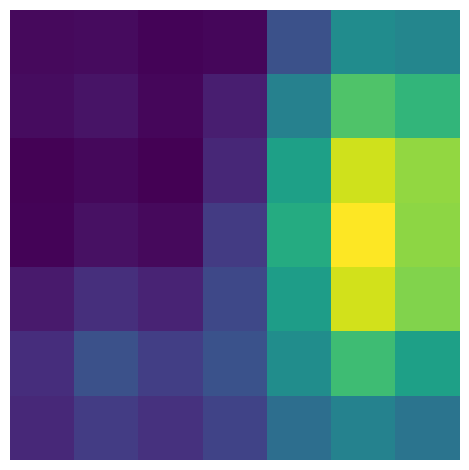

In [25]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

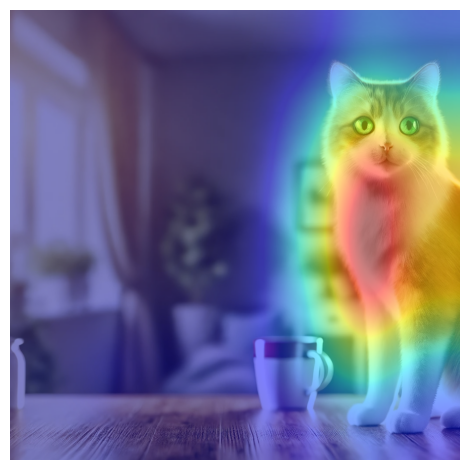

In [24]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

## TLDR <a class="anchor" id="last-bullet"></a>

* 0-shot details: https://medium.com/@heyamit10/zero-shot-learning-for-image-classification-f49758cfbbc5
* CAM library: https://github.com/frgfm/torch-cam
* CAM article: https://medium.com/@akshayush007/journey-llm-13-class-activation-maps-a-guide-to-cnn-interpretation-c1c4c2e8a335
* MIL Multiple instance learning: https://medium.com/@minhkhangle.phd/multiple-instance-learning-mil-and-its-utility-in-whole-slide-image-wsi-analyses-3acb67f5434b
* **MIL Mnist:** https://medium.com/swlh/multiple-instance-learning-c49bd21f5620
* Siamese network: https://medium.com/@rinkinag24/a-comprehensive-guide-to-siamese-neural-networks-3358658c0513
* Siamese with Triplet loss: https://medium.com/@enoshshr/triplet-loss-and-siamese-neural-networks-5d363fdeba9b
* BLIP: https://ahmed-sabir.medium.com/paper-summary-blip-bootstrapping-language-image-pre-training-for-unified-vision-language-c1df6f6c9166
* also BLIP: https://medium.com/@jiangmen28/blip-bootstrapping-language-image-pre-training-for-unified-vision-language-understanding-and-8d7fb2e4813c
* 1-shot learning, siamese, triplet loss: https://medium.com/@crimy/one-shot-learning-siamese-networks-and-triplet-loss-with-keras-2885ed022352